<a href="https://colab.research.google.com/github/jdarguello/Ciclo2_Java/blob/master/RelacionesClases.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div align="center">
  <h1><strong>Relaciones entre <i>Clases</i></strong></h1>
  <strong>Hecho por:</strong> Juan David Argüello Plata
</div>


## __Introducción__

<div align="justify">

Las _relaciones_ entre clases constituyen la comunicación entre diferentes algoritmos. Si una clase nos permite establecer una estructura de programación, las relaciones entre ellas facilitan el desarrollo de software.

</div>

---

_Nota:_ __ejecuta__ este primer bloque de código antes de utilizar el material interactivo, luego debes recargar la página &#8635; para poder usarlo sin problema.

In [ ]:
!wget https://github.com/SpencerPark/IJava/releases/download/v1.3.0/ijava-1.3.0.zip
!unzip ijava-1.3.0.zip
!python install.py --sys-prefix

## __Tipos de relaciones__

Existen diferentes tipos de relaciones entre clases, entre ellas se destacan:

* __Asociación:__ Establece una conexión básica entre una clase y otra. Consiste en crear la instancia de una clase (objeto) dentro de otra.

* __Agregación:__ tipo especial de asociación que establece una independencia entre los objetos; es decir: la existencia de los objetos es independiente de la relación.

* __Composición:__ a diferencia de la relación de agregación, establece una dependencia directa entre los objetos. Uno de ellos no puede existir sin el otro.

* __Multiplicidad:__ define un número de relaciones entre clases. Por ejemplo: el número de empleados en una empresa, el número de bancos en una ciudad, etc.

* __Herencia:__ Categoriza las clases en subclases (_hijos_) y superclase (_padre_). Las subclases heredan los métodos y atributos de la superclase. Algunas superclases se pueden llegar a catalogar como una _"clase abstracta"_ debido a que, normalmente, se emplean como un formato general para las clases derivadas. Este concepto se verá en detalle en clases posteriores.

* __Polimorfismo:__ permite cambiar la forma de los métodos heredados a las subclases. Se verá en detalle en clases posteriores.

## __1. Asociación__

Brinda una relación básica entre un objeto y otro. Por ejemplo: una interfaz interactiva con un sistema de facturación.

<div align="center">

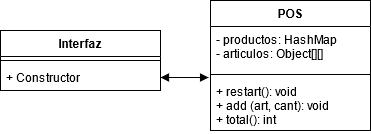

<i>Figura 1.</i> Diagrama UML - ejemplo.

</div>

In [ ]:
import java.util.Scanner;

class POS {
  //---Atributos---
  private static HashMap<String, Integer> productos = new HashMap() {{
    put("Helado vainilla", 1_000);
    put("Helado chocolate", 1_200);
    put("Helado chicle", 800);
  }};
  private Object[][] articulos = {};

  //---Métodos---
  public void restart() {
    //Objetivo: reiniciar la variable artículos
    articulos = new Object[][] {};
  }

  public void add(String articulo, byte cantidad) {
    articulos = Arrays.copyOf(articulos, articulos.length +1);
    articulos[articulos.length-1] = new Object[] {articulo, cantidad};
  }

  public int total() {
    //Objetivo: calcular el total de compra
    int total = 0;
    for (Object[] art: articulos) {
      total += ((byte)art[1])*productos.get(((String)art[0]));
    }
    return total;
  }
}

class Interfaz {
  //---Métodos---
  public Interfaz() {
    //Herramientas
    POS factura = new POS();
    Scanner input = new Scanner(System.in);

    //Interactividad
    String art;
    byte cantidad;
    while (true) {
      System.out.println("¿Qué artículo deseas comprar?");
      art = input.nextLine();
      System.out.println("¿Cuánta cantidad?");
      cantidad = input.nextByte();
      factura.add(art, cantidad);   //Adición de artículos a la factura -> Método POS.add()

      System.out.println("Subtotal = $" + factura.total());
      System.out.println("¿Deseas seguir comprando? (s/n)");
      if ((input.next()).equals("n")) {
        break;
      }
      input.nextLine();
    }
    System.out.println("El total de tu compra fue: $" + factura.total());
    factura.restart();  //Reinicia los atributos POS
  }
}
//--------------------------------------------------------------------------------------------

 Interfaz negocio1 = new Interfaz();


## __2. Agregación__

Establece una relación asociativa entre varios objetos. Por ejemplo: la relación entre un colegio y sus estudiantes. Esta relación puede tener una gran variedad de detalles, pero para un ejemplo preliminar, se puede establecer una estructura básica como la que se muestra en la Figura 1.

<div align="center">

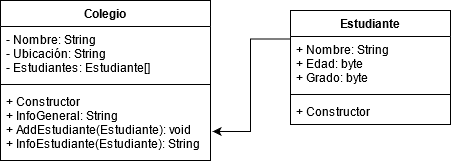

<i>Figura 2.</i> Relación de asociación entre un colegio y un estudiante.

</div>

In [ ]:
class Estudiante {
  //---Atributos---
  String nombre;
  byte edad;
  byte grado;

  //---Métodos---
  //Constructor
  public Estudiante(String name, byte age, byte grade) {
    nombre = name;
    edad = age;
    grado = grade;
  }
  public String info() {
    return nombre + " tiene " + edad + " años y está en " + grado + " grado.";
  }
}

class Colegio {
  //---Atributos---
  private String nombre;
  private String ubicacion;
  private Estudiante[] estudiantes = new Estudiante[]{};

  //---Métodos---
  public Colegio (String nombre, String ubicacion) {
    this.nombre = nombre;
    this.ubicacion = ubicacion;
  }
  public String infoGeneral() {
    return nombre + " está ubicado en " + ubicacion;
  }
  public void addEstudiante(Estudiante student) {
    //Se expande el vector a través de una copia
    estudiantes = Arrays.copyOf(estudiantes, estudiantes.length+1);
    //Se añade el estudiante en la última posición 
    estudiantes[estudiantes.length-1] = student;
    System.out.println("Se añadió al estudiante " + student.nombre);
  } 
  public void infoEstudiante(String student_name) { 
    //Se inicia iterando sobre la base de datos de estudiantes
    for (Estudiante est: estudiantes) {
      //Se compara si 'student' es igual a 'est'
      if ((est.nombre).equals(student_name)) {
        System.out.println(est.info());
      }
    }
  }
}

//---Ejemplo---
Colegio san_pedro = new Colegio("San Pedro", "Cll 45");

System.out.println(san_pedro.infoGeneral());

//JUAN CARLOS
Estudiante juanca = new Estudiante("Juan Carlos", (byte)14, (byte)8);
san_pedro.addEstudiante(juanca);  //Se añade a Juan Carlos al colegio

//ALEJANDRA GÓMEZ
Estudiante aleja = new Estudiante("Alejandra Gómez", (byte)14, (byte)9);
san_pedro.addEstudiante(aleja);   //Se añade a Alejandra Gómez al colegio

//INFORMACIÓN
System.out.println("\n");
san_pedro.infoEstudiante(juanca.nombre);
san_pedro.infoEstudiante(aleja.nombre);

Otro ejemplo podría ser la de un empleado y una empresa, como se aprecia en la Figura 3.

<div align="center">

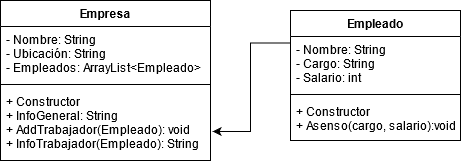

<i>Figura 4.</i> Diagrama UML.

</div>

In [ ]:
class Empleado {
  private String nombre;
  private String cargo;
  private int salario;

  public Empleado(String name, String cargoo, int salary) {
    nombre = name;
    cargo = cargoo;
    salario = salary;
  }

  public void asenso(String cargo, int salario) {
    this.cargo = cargo;
    this.salario = salario;
    System.out.println(nombre + " es " + cargo + " y gana $" + salario);
  }

  public Object[] info() {
    return new Object[] {nombre, cargo, salario};
  }
}

class Empresa {
  //---Atriutos---
  private String nombre;
  private String ubicacion;
  private ArrayList<Empleado> empleados = new ArrayList();

  //---Métodos---
  public Empresa (String name, String address) {
    nombre = name;
    ubicacion = address;
  }

  public String infoGeneral() {
    return nombre + " está ubicada en " + ubicacion;
  }

  public void addTrabajador(Empleado worker) {
    empleados.add(worker);
  }

  public void infoTrabajador(String nombre) {
    for (Empleado worker: empleados) {
      Object[] worker_info = worker.info();
      if (((String)worker_info[0]).equals(nombre)) {
        System.out.println(worker_info[0] + " es " + worker_info[1] + " y gana $" + worker_info[2]);
        break;
      }
    }
  }  
}

//------------------------------------------------------------------------------------------------------

Empresa McPollo = new Empresa("McPollo Floridablanca", "Av. Principal");

McPollo.addTrabajador(new Empleado("John Alejandro", "Maquinista 1", 1_200_000));
McPollo.addTrabajador(new Empleado("Johana Alejandra", "Maquinista 1", 1_200_000));

McPollo.infoTrabajador("Johana Alejandra");

## __3. Composición__

Tipo de relación en el que se produce una dependencia existencial entre los objetos. Por ejemplo: la relación entre una persona y su trabajo. 

In [ ]:
class Trabajo {
  private String cargo;
  private int salario;
  
  public Trabajo (String cargo, int salario) {
    this.cargo = cargo;
    this.salario = salario;
  }

  public void ascenso (String cargo, int salario) {
    this.cargo = cargo;
    this.salario = salario;
  }

  public String descripcion() {
    return cargo + " - $" + salario;
  }

}

class Persona {
  private String nombre;
  private byte edad;
  private Trabajo job;

  public Persona (String name, byte age, Trabajo work) {
    nombre = name;
    edad = age;
    job = work;
    System.out.println("Se creó la persona " + nombre + " de " + age + " años. " + job.descripcion());
  }
  public void ascender (String cargo, int salario) {
    this.job.ascenso(cargo, salario);
    System.out.println(nombre + " ha sido ascendido a " + this.job.descripcion());
  }
}

//-----------------------------------------------------------------

Persona juan = new Persona("Juan Esteban", (byte)22, new Trabajo("Operador 1", 1_200_000));

juan.ascender("Operador 2", 2_500_000);

## __4. Ejercicios__

### 4.1. Persona - Trabajo

Construye la relación entre una persona y su trabajo. Puedes usar como guía el esquema mostrado:

<div align="center">
  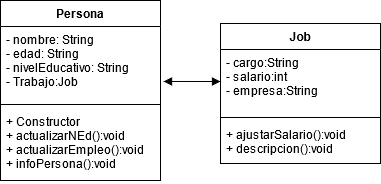
</div>

### 4.2. _Blog personal_

Construye la lógica detrás de un blog personal (similar a un foro). 

<div align="center">
  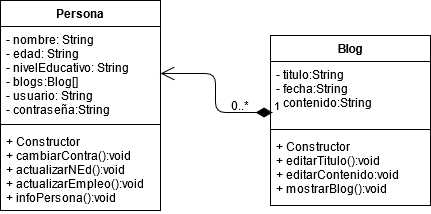
</div>

### 4.3. Botiquín salvavidas

Estas elaborando un software de control de inventarios de un hospital. 

<div align="center">
  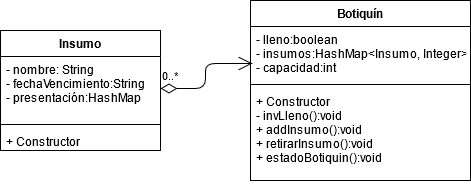
</div>

### 4.4. _Inventario en un hospital_

Para complementar la lógica del ejercicio anterior, adaptarás al algoritmo anterior el siguiente sistema de clases.